# Amadeus Data Challenge

## Lorenzo von Ritter

### Exercise 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [39]:
time searches = pd.read_csv("../searches.csv", sep="^", usecols=['Date','Origin','Destination'], parse_dates=[0], dtype={'Origin': object,'Destination': object})

CPU times: user 2min 18s, sys: 7.52 s, total: 2min 26s
Wall time: 2min 53s


In [43]:
searches.dtypes

Date           object
Origin         object
Destination    object
dtype: object

In [44]:
searches.Date = pd.to_datetime(searches.Date)

In [48]:
searches.dtypes

Date           object
Origin         object
Destination    object
dtype: object

In [50]:
special_searches = searches[(searches["Destination"] == "AGP") | (searches["Destination"] == "BCN") | (searches["Destination"] == "MAD")]

In [52]:
datecount = special_searches.groupby(['Date','Destination']).Date.count()
datecount = datecount.unstack('Destination')
datecount.index = pd.to_datetime(datecount.index)

In [53]:
monthcount = datecount.resample('M', how=sum)
monthcount

Destination,AGP,BCN,MAD
2013-01-31,9633,29469,24258
2013-02-28,8379,28329,22800
2013-03-31,10659,30552,24681
2013-04-30,8265,31236,25251
2013-05-31,10830,28728,26334
2013-06-30,7923,26505,22800
2013-07-31,8892,29241,22971
2013-08-31,7866,27075,21831
2013-09-30,8151,23427,21147
2013-10-31,6499,20276,22294


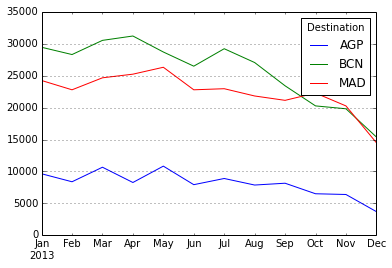

In [54]:
monthcount.plot()